In [1]:
import zipfile
import pandas as pd
import numpy as np
from PIL import Image
import io
# List of paths to your zip files 
# The four zip files should be:
# 1. inpainting.zip
# 2. insight.zip
# 3. text2img.zip
# 4. wiki.zip (contains real images)

#Make sure you do not commit the data to the repository
#Also make sure to not upload your paths to the repository


zip_paths = [
    '../mle_group_6_data/inpainting.zip',
    '../mle_group_6_data/insight.zip',
    '../mle_group_6_data/text2img.zip',
    '../mle_group_6_data/wiki.zip'
]

# Function to add image data to a DataFrame from multiple zip files
def create_image_dataframe(zip_paths, base_num_images_per_zip=1500):
    # List to store image data
    data = []
    data_inpainting = []
    data_insight = []
    data_text2img = []

    # Process each zip file
    for zip_path in zip_paths:
        print(f"Processing zip file: {zip_path}")  # Print current zip file being processed

        # Determine number of images to process based on zip file name
        if 'wiki.zip' in zip_path:
            num_images_per_zip = base_num_images_per_zip * 3
        else:
            num_images_per_zip = base_num_images_per_zip

        with zipfile.ZipFile(zip_path, 'r') as z:
            image_count = 0  # Initialize image counter for the current zip file

            # Iterate over each item in the zip
            for file in sorted(z.namelist()):
                if file.endswith(('.png', '.jpg', '.jpeg')) and '/' in file:
                    # Read the image
                    image_data = z.read(file)
                    image = Image.open(io.BytesIO(image_data))

                    # Convert image to grayscale and resize
                    image = image.convert('RGB').resize((128, 128), Image.LANCZOS)
                    img_array = np.array(image)

                    # Determine if the image is a deepfake or not based on the zip file
                    is_deep_fake = not zip_path.endswith('wiki.zip')
                    
                    # Pack info about image
                    image_info = {
                        'Zip Folder': zip_path,
                        'Image Path': file,
                        'Is DeepFake': is_deep_fake,
                        'Image Data': img_array.flatten()  # Flatten the array
                    }

                    # Append image information to the list
                    data.append(image_info)
                    
                    if (zip_path.endswith('inpainting.zip')):
                        data_inpainting.append(image_info)
                    elif (zip_path.endswith('insight.zip')):
                        data_insight.append(image_info)
                    elif (zip_path.endswith('text2img.zip')):
                        data_text2img.append(image_info)
                    
                    if (zip_path.endswith('wiki.zip')):
                        if image_count < num_images_per_zip / 3:
                            data_inpainting.append(image_info)
                            data_insight.append(image_info)
                            data_text2img.append(image_info)

                    image_count += 1
                    if image_count >= num_images_per_zip:
                        break
                        
                else:
                    print(file)

    # Convert list to DataFrame
    df = pd.DataFrame(data)
    df_inpainting = pd.DataFrame(data_inpainting)
    df_insight = pd.DataFrame(data_insight)
    df_text2img = pd.DataFrame(data_text2img)
    return df, df_inpainting, df_insight, df_text2img

# Call the function and store the DataFrame with all types of fake images
df_images, df_images_inpainting, df_images_insight, df_images_text2img  = create_image_dataframe(zip_paths)

Processing zip file: ../mle_group_6_data/inpainting.zip
inpainting/
inpainting/00/
inpainting/01/
inpainting/02/
inpainting/03/
inpainting/04/
inpainting/05/
Processing zip file: ../mle_group_6_data/insight.zip
insight/
insight/00/
insight/01/
insight/02/
insight/03/
insight/04/
insight/05/
Processing zip file: ../mle_group_6_data/text2img.zip
text2img/
text2img/00/
text2img/01/
text2img/02/
text2img/03/
text2img/04/
text2img/05/
Processing zip file: ../mle_group_6_data/wiki.zip
wiki/
wiki/00/
wiki/01/
wiki/02/
wiki/03/
wiki/04/
wiki/05/
wiki/06/
wiki/07/
wiki/08/
wiki/09/
wiki/10/
wiki/11/
wiki/12/
wiki/13/
wiki/14/
wiki/15/


In [16]:
def verify_data_loading(df_images):
    image_counts = df_images['Zip Folder'].value_counts()
    dataset_size = 0
    for count in image_counts:
        dataset_size = dataset_size + count
    print ("Total images in dataset: ", dataset_size)
    print("Number of images from each zip folder in dataset:")
    print(image_counts, "\n")
    
    
print("Main dataset")
verify_data_loading(df_images)
print("inpainting dataset")
verify_data_loading(df_images_inpainting)
print("insight dataset")
verify_data_loading(df_images_insight)
print("text2img dataset")
verify_data_loading(df_images_text2img)


Main dataset
Total images in dataset:  9000
Number of images from each zip folder in dataset:
Zip Folder
../mle_group_6_data/wiki.zip          4500
../mle_group_6_data/inpainting.zip    1500
../mle_group_6_data/insight.zip       1500
../mle_group_6_data/text2img.zip      1500
Name: count, dtype: int64 

inpainting dataset
Total images in dataset:  3000
Number of images from each zip folder in dataset:
Zip Folder
../mle_group_6_data/inpainting.zip    1500
../mle_group_6_data/wiki.zip          1500
Name: count, dtype: int64 

insight dataset
Total images in dataset:  3000
Number of images from each zip folder in dataset:
Zip Folder
../mle_group_6_data/insight.zip    1500
../mle_group_6_data/wiki.zip       1500
Name: count, dtype: int64 

text2img dataset
Total images in dataset:  3000
Number of images from each zip folder in dataset:
Zip Folder
../mle_group_6_data/text2img.zip    1500
../mle_group_6_data/wiki.zip        1500
Name: count, dtype: int64 



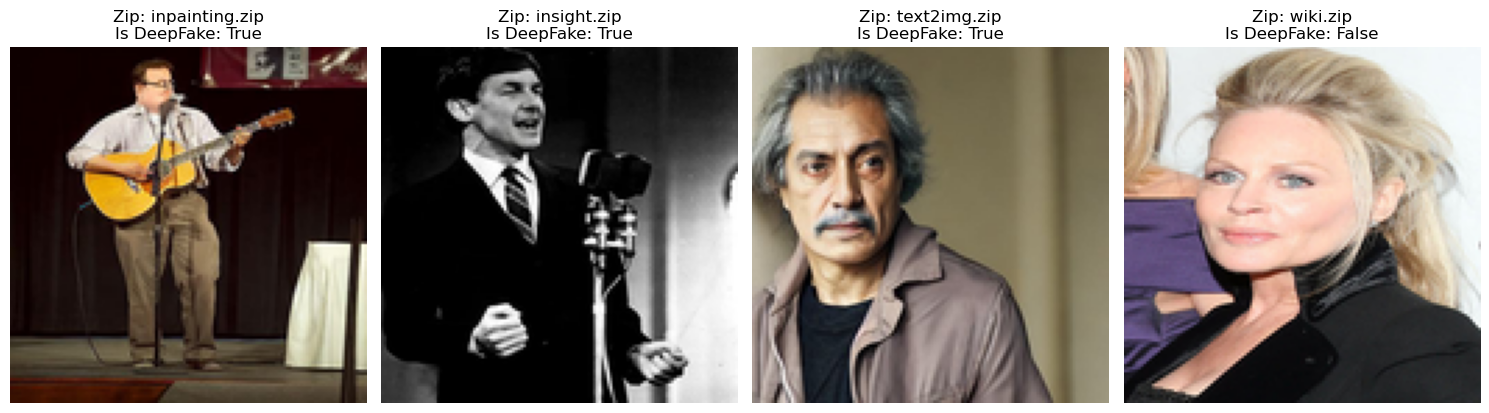

In [17]:
import matplotlib.pyplot as plt
import random

def display_random_images_from_each_zip(df_images):
    # Find unique zip folders
    unique_zip_folders = df_images['Zip Folder'].unique()

    fig, axes = plt.subplots(1, len(unique_zip_folders), figsize=(15, 5))

    # Loop through each unique zip folder
    for i, zip_folder in enumerate(unique_zip_folders):
        # Filter the DataFrame for images only from the current zip folder
        folder_images = df_images[df_images['Zip Folder'] == zip_folder]
        
        # Select a random image from this folder
        random_index = random.randint(0, len(folder_images) - 1)
        image_row = folder_images.iloc[random_index]
        image_data = image_row['Image Data'].reshape(128, 128, 3)  # Reshape the flattened array back to 128x128
        is_deep_fake = image_row['Is DeepFake']  # Retrieve the 'Is DeepFake' status correctly from the row

        # Plot the image
        ax = axes[i] if len(unique_zip_folders) > 1 else axes
        ax.imshow(image_data, cmap='gray')
        ax.axis('off')  # Turn off axis
        ax.set_title(f"Zip: {zip_folder.split('/')[-1]}\nIs DeepFake: {is_deep_fake}")


    plt.tight_layout()
    plt.show()

# Call the function to display the images
display_random_images_from_each_zip(df_images)


In [20]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

def count_classes(labels):
        # Count classes in the label array
        unique, counts = np.unique(labels, return_counts=True)
        return dict(zip(unique, counts))

def prepare_data_for_cnn(df_images):
    # Convert flattened images to 2D shape and expand dimensions to include the channel
    images = np.stack(df_images['Image Data'].apply(lambda x: np.reshape(x, (128, 128, 3))))

    # Normalize the images to have values between 0 and 1
    #images = images.astype('float32') / 255.0

    # Extract labels and convert them to integer format
    labels = df_images['Is DeepFake'].values.astype('int')
    
    # Shuffle the data to ensure randomness before stratified splitting
    indices = np.arange(len(labels))
    np.random.shuffle(indices)
    images_shuffled = images[indices]
    labels_shuffled = labels[indices]

    # Split data into train+val and test using stratified sampling to maintain class distribution
    X_train_val, X_test, y_train_val, y_test = train_test_split(images_shuffled, labels_shuffled, test_size=0.1, stratify=labels_shuffled, random_state=42)

    # Split train+val into train and val
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.111, stratify=y_train_val, random_state=42)  # 0.111 is roughly 10% of 0.9

    # Create TensorFlow datasets from the numpy arrays
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

    # Batch the datasets
    train_dataset = train_dataset.shuffle(buffer_size=1000).batch(32)
    val_dataset = val_dataset.batch(32)
    test_dataset = test_dataset.batch(32)

    # Print dataset cardinalities and class distribution
    print("Training set size:", len(y_train), "Class distribution:", count_classes(y_train))
    print("Test set size:", len(y_test), "Class distribution:", count_classes(y_test))
    print("Validation set size:", len(y_val), "Class distribution:", count_classes(y_val))

    # Take one batch from the dataset and print shapes
    for images_batch, labels_batch in train_dataset.take(1):
        print("Images shape:", images_batch.shape)  # Expected shape: (batch_size, 128, 128, 3)
        print("Labels shape:", labels_batch.shape)  # Expected shape: (batch_size,)
    
    print()
    
    return train_dataset, val_dataset, test_dataset

train_dataset, val_dataset, test_dataset = prepare_data_for_cnn(df_images)
train_dataset_inpainting, val_dataset_inpainting, test_dataset_inpainting = prepare_data_for_cnn(df_images_inpainting)
train_dataset_insight, val_dataset_insight, test_dataset_insight = prepare_data_for_cnn(df_images_insight)
train_dataset_text2img, val_dataset_text2img, test_dataset_text2img = prepare_data_for_cnn(df_images_text2img)


Training set size: 7200 Class distribution: {0: 3600, 1: 3600}
Test set size: 900 Class distribution: {0: 450, 1: 450}
Validation set size: 900 Class distribution: {0: 450, 1: 450}
Images shape: (32, 128, 128, 3)
Labels shape: (32,)



2024-04-26 16:00:24.742335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-26 16:00:24.938964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Training set size: 2400 Class distribution: {0: 1200, 1: 1200}
Test set size: 300 Class distribution: {0: 150, 1: 150}
Validation set size: 300 Class distribution: {0: 150, 1: 150}
Images shape: (32, 128, 128, 3)
Labels shape: (32,)

Training set size: 2400 Class distribution: {0: 1200, 1: 1200}
Test set size: 300 Class distribution: {0: 150, 1: 150}
Validation set size: 300 Class distribution: {0: 150, 1: 150}
Images shape: (32, 128, 128, 3)
Labels shape: (32,)

Training set size: 2400 Class distribution: {0: 1200, 1: 1200}
Test set size: 300 Class distribution: {0: 150, 1: 150}
Validation set size: 300 Class distribution: {0: 150, 1: 150}
Images shape: (32, 128, 128, 3)
Labels shape: (32,)



2024-04-26 16:00:25.134146: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-26 16:00:25.326330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.applications import MobileNetV2
#highest accuracy so far is 0.64

base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False
l2_reg = 0.01

# Create the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),  # Increased units
    layers.BatchNormalization(),  # Added Batch Normalization
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),  # Additional dense layer
    layers.BatchNormalization(),  # Added Batch Normalization
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),  # Additional dense layer
    layers.BatchNormalization(),  # Added Batch Normalization
    layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(l2_reg))
])

# Compile the model
model.compile(optimizer=optimizers.Adam(.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
history = model.fit(
    train_dataset,
    epochs=4,
    validation_data=val_dataset
)

Epoch 1/4
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 181ms/step - accuracy: 0.6080 - loss: 3.1924 - val_accuracy: 0.6233 - val_loss: 2.9574
Epoch 2/4
225/225 ━━━━━━━━━━━━━━━━━━━━ 40s 177ms/step - accuracy: 0.6185 - loss: 2.9240 - val_accuracy: 0.6211 - val_loss: 2.7653
Epoch 3/4
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 181ms/step - accuracy: 0.6163 - loss: 2.7204 - val_accuracy: 0.6056 - val_loss: 2.5869
Epoch 4/4
225/225 ━━━━━━━━━━━━━━━━━━━━ 42s 185ms/step - accuracy: 0.6297 - loss: 2.5358 - val_accuracy: 0.6344 - val_loss: 2.4168


In [33]:
results = model.evaluate(test_dataset)
print("test loss, test acc:", results)

results_inpainting = model.evaluate(test_dataset_inpainting)
print("test loss, test acc:", results_inpainting)

results_insight = model.evaluate(test_dataset_insight)
print("test loss, test acc:", results_insight)

results_text2img = model.evaluate(test_dataset_text2img)
print("test loss, test acc:", results_text2img)

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.6447 - loss: 2.4218
test loss, test acc: [2.4152185916900635, 0.6433333158493042]
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - accuracy: 0.6033 - loss: 2.4207
test loss, test acc: [2.4225621223449707, 0.6000000238418579]
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - accuracy: 0.5130 - loss: 2.5241
test loss, test acc: [2.519685983657837, 0.5066666603088379]
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.8298 - loss: 2.2544
test loss, test acc: [2.242370128631592, 0.8533333539962769]


 1/29 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step

2024-04-26 16:28:36.886722: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step


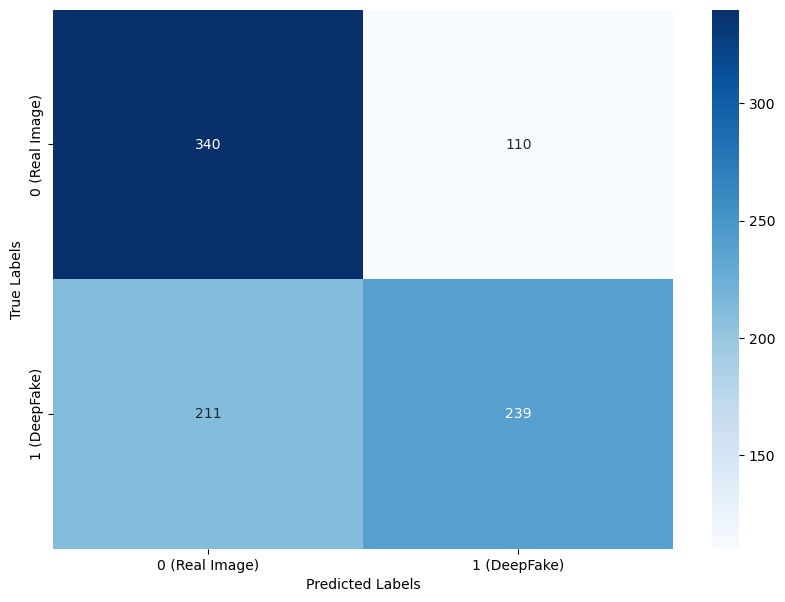

 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step

2024-04-26 16:28:41.676703: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step


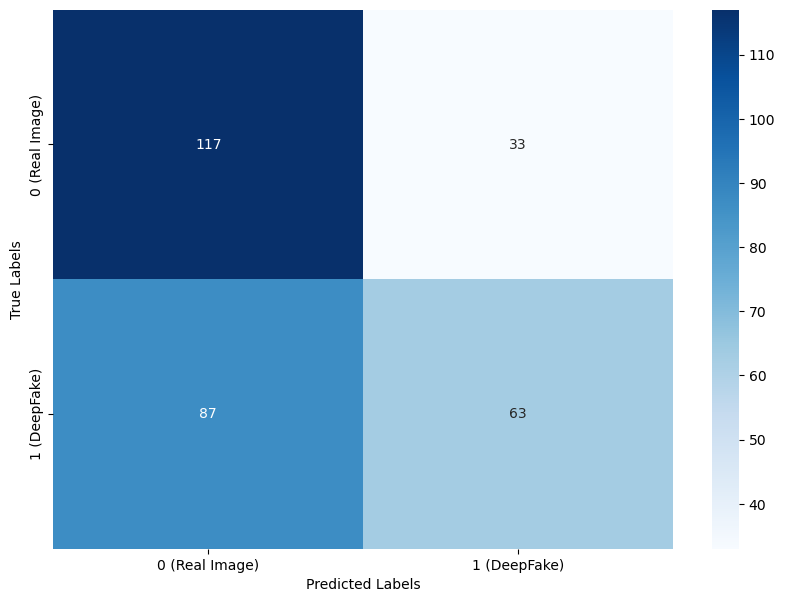

 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

2024-04-26 16:28:43.300915: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step


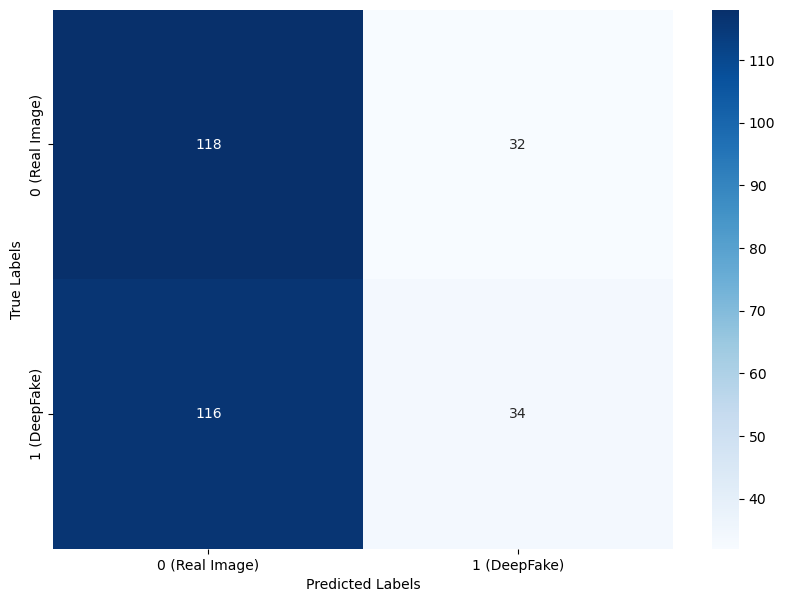

 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

2024-04-26 16:28:44.904495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step


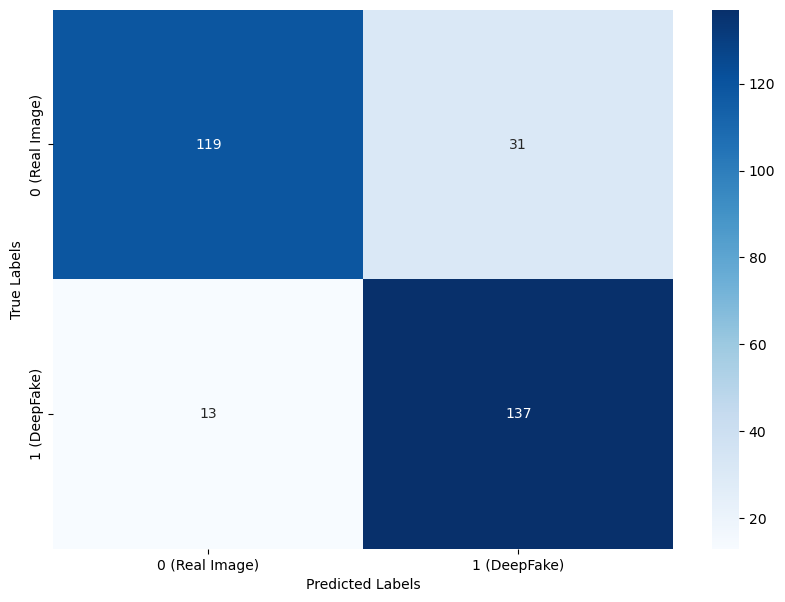

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def create_plot_confusion_matrix(test_dataset):
    # Get the true labels
    y_true = np.concatenate([y for x, y in test_dataset], axis=0)

    # Get the predicted labels as probabilities
    y_pred_prob = model.predict(test_dataset)

    # Convert the probabilities into class labels
    y_pred = np.where(y_pred_prob > 0.5, 1, 0)

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a heatmap from the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0 (Real Image)', '1 (DeepFake)'], 
            yticklabels=['0 (Real Image)', '1 (DeepFake)'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    
    return cm

cm = create_plot_confusion_matrix(test_dataset)
cm_inpainting = create_plot_confusion_matrix(test_dataset_inpainting)
cm_insight = create_plot_confusion_matrix(test_dataset_insight)
cm_text2img = create_plot_confusion_matrix(test_dataset_text2img)



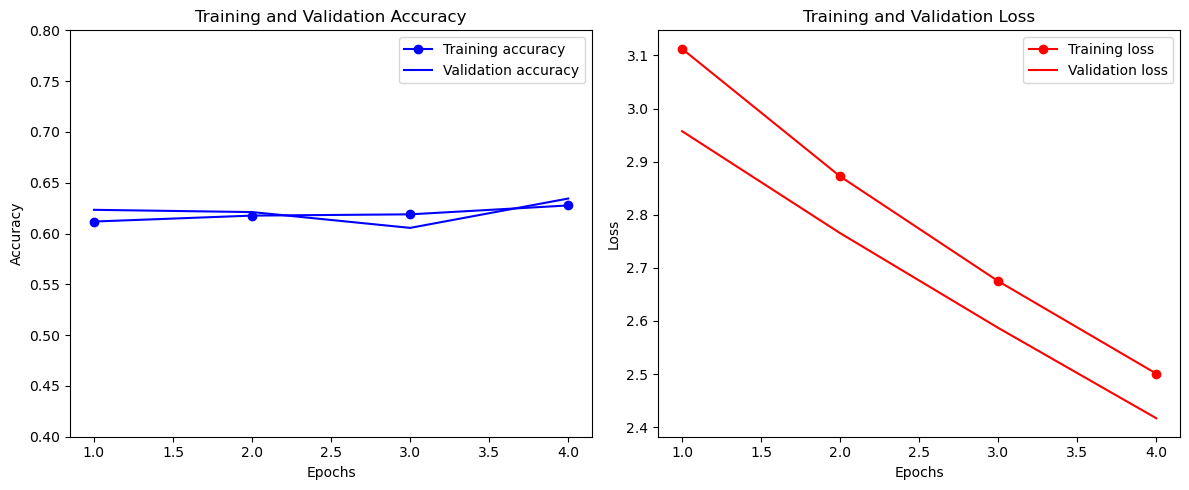

In [42]:
def create_plots(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plotting the Training and Validation Accuracy graph
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0.4, 0.8)
    plt.legend()

    # Plotting the Training and Validation Loss graph
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'ro-', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

create_plots(history)

In [43]:
from sklearn.metrics import f1_score

def calculate_f1_score(model, test_dataset):
    y_true = []
    y_pred = []
    for images, labels in test_dataset:
        y_true.extend(labels.numpy())
        
        # Predict the probabilities and apply a threshold to get binary predictions
        probabilities = model.predict(images, verbose=False)
        predictions = (probabilities > 0.5).astype(int)
        y_pred.extend(predictions.flatten())

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, zero_division=1)
    return f1

f1_score_value = calculate_f1_score(model, test_dataset)
print("F1 Score on full dataset:", f1_score_value)

f1_score_value_inpainting = calculate_f1_score(model, test_dataset_inpainting)
print("F1 Score on inpainting dataset:", f1_score_value_inpainting)

f1_score_value_insight = calculate_f1_score(model, test_dataset_insight)
print("F1 Score on insight dataset:", f1_score_value_insight)

f1_score_value_text2img = calculate_f1_score(model, test_dataset_text2img)
print("F1 Score on text2img dataset:", f1_score_value_text2img)

2024-04-26 16:30:33.679042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


F1 Score on full dataset: 0.5982478097622027


2024-04-26 16:30:35.089963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


F1 Score on inpainting dataset: 0.5121951219512195


2024-04-26 16:30:36.340665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


F1 Score on insight dataset: 0.31481481481481477
F1 Score on text2img dataset: 0.8616352201257862


2024-04-26 16:30:37.683660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [44]:
def calculate_accuracy(model, conf_mat, test_dataset):
    # Extracting TP, TN, FP, FN from the already obtained confusion matrix
    TN, FP, FN, TP = conf_mat.ravel() if conf_mat.size == 4 else (conf_mat[0, 0], 0, 0, conf_mat[1, 1] if conf_mat.shape[0] == 2 else 0)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy

accuracy_value = calculate_accuracy(model, cm, test_dataset)
print("Accuracy:", accuracy_value)

accuracy_value_inpainting = calculate_accuracy(model, cm_inpainting, test_dataset_inpainting)
print("Accuracy on inpainting dataset:", accuracy_value_inpainting)

accuracy_value_insight = calculate_accuracy(model, cm_insight, test_dataset_insight)
print("Accuracy on insight dataset:", accuracy_value_insight)

accuracy_value_text2img = calculate_accuracy(model, cm_text2img, test_dataset_text2img)
print("Accuracy on text2img dataset:", accuracy_value_text2img)

Accuracy: 0.6433333333333333
Accuracy on inpainting dataset: 0.6
Accuracy on insight dataset: 0.5066666666666667
Accuracy on text2img dataset: 0.8533333333333334
